# **Cycling analysis**

---

## **Imports**

In [1]:
import os
from urllib.parse import urljoin
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

---

## **Import csv files**

### **Inspect differences between CSV files**

In [2]:
data_folder = "data/tfl_cycling_data"

# Get CSVs
csv_files = sorted([f for f in os.listdir(data_folder) if f.endswith(".csv")])

# Store column names for each file
column_map = {}

# Extract column names from each CSV
for file in csv_files:
    df = pd.read_csv(os.path.join(data_folder, file), nrows=1)
    column_map[file] = set(df.columns)

# Find unique sets of column names
unique_column_sets = {}
for file, columns in column_map.items():
    columns_tuple = tuple(sorted(columns))
    if columns_tuple not in unique_column_sets:
        unique_column_sets[columns_tuple] = []
    unique_column_sets[columns_tuple].append(file)

for idx, (columns, files) in enumerate(unique_column_sets.items()):
    print(f"🔹 **Column Set {idx+1}: Found in {len(files)} files**")
    print(f"Files: {files[:5]}{'...' if len(files) > 5 else ''}")
    print(f"Columns: {columns}\n")

🔹 **Column Set 1: Found in 89 files**
Files: ['246JourneyDataExtract23Dec2020-29Dec2020.csv', '246JourneyDataExtract30Dec2020-05Jan2021.csv', '247JourneyDataExtract06Jan2021-12Jan2021.csv', '248JourneyDataExtract13Jan2021-19Jan2021.csv', '249JourneyDataExtract20Jan2021-26Jan2021.csv']...
Columns: ('Bike Id', 'Duration', 'End Date', 'EndStation Id', 'EndStation Name', 'Rental Id', 'Start Date', 'StartStation Id', 'StartStation Name')

🔹 **Column Set 2: Found in 1 files**
Files: ['325JourneyDataExtract06Jul2022-12Jul2022.csv']
Columns: ('Bike Id', 'Duration', 'End Date', 'EndStation Name', 'Rental Id', 'Start Date', 'StartStation Id', 'StartStation Name')

🔹 **Column Set 3: Found in 53 files**
Files: ['335JourneyDataExtract12Sep2022-18Sep2022.csv', '336JourneyDataExtract19Sep2022-25Sep2022.csv', '337JourneyDataExtract26Sep2022-02Oct2022.csv', '338JourneyDataExtract03Oct2022-09Oct2022.csv', '339JourneyDataExtract10Oct2022-16Oct2022.csv']...
Columns: ('Bike model', 'Bike number', 'End date

### **Group similar files**

In [3]:
file_groups = {}

for idx, (columns, files) in enumerate(unique_column_sets.items()):
    var_name = f"group_{idx+1}"
    file_groups[var_name] =  files

group_1 = file_groups.get("group_1", [])
group_2 = file_groups.get("group_2", [])
group_3 = file_groups.get("group_3", [])

print("Group 1 files:", group_1[:5])
print("Group 2 files:", group_2[:5])
print("Group 3 files:", group_3[:5])

Group 1 files: ['246JourneyDataExtract23Dec2020-29Dec2020.csv', '246JourneyDataExtract30Dec2020-05Jan2021.csv', '247JourneyDataExtract06Jan2021-12Jan2021.csv', '248JourneyDataExtract13Jan2021-19Jan2021.csv', '249JourneyDataExtract20Jan2021-26Jan2021.csv']
Group 2 files: ['325JourneyDataExtract06Jul2022-12Jul2022.csv']
Group 3 files: ['335JourneyDataExtract12Sep2022-18Sep2022.csv', '336JourneyDataExtract19Sep2022-25Sep2022.csv', '337JourneyDataExtract26Sep2022-02Oct2022.csv', '338JourneyDataExtract03Oct2022-09Oct2022.csv', '339JourneyDataExtract10Oct2022-16Oct2022.csv']


### **Separate unique files into separate Data Frames**

In [4]:
data_folder = "data/tfl_cycling_data"

df1_batch = [pd.read_csv(os.path.join(data_folder, file)) for file in group_1]
df1 =  pd.concat(df1_batch, ignore_index=True)

df2_batch = [pd.read_csv(os.path.join(data_folder, file)) for file in group_2]
df2 =  pd.concat(df2_batch, ignore_index=True)

df3_batch = [pd.read_csv(os.path.join(data_folder, file)) for file in group_3]
df3 =  pd.concat(df3_batch, ignore_index=True)

/var/folders/xk/r3ls7bqd0b3fdrwsj9bcv3t40000gn/T/ipykernel_75135/993685103.py:9: DtypeWarning: Columns (2,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df3_batch = [pd.read_csv(os.path.join(data_folder, file)) for file in group_3]
/var/folders/xk/r3ls7bqd0b3fdrwsj9bcv3t40000gn/T/ipykernel_75135/993685103.py:9: DtypeWarning: Columns (2,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df3_batch = [pd.read_csv(os.path.join(data_folder, file)) for file in group_3]
/var/folders/xk/r3ls7bqd0b3fdrwsj9bcv3t40000gn/T/ipykernel_75135/993685103.py:9: DtypeWarning: Columns (2,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df3_batch = [pd.read_csv(os.path.join(data_folder, file)) for file in group_3]


---

## **Rename columns**

#### **Comparison**  
- df 2 is missing <code>end_station_id</code>.  
- df3 has two additional features <code>bike_model</code> and <code>total_duration</code>.  
- <code>total_duration</code> is redundant as there is another feature which covers duration in ms in df3.  

In [5]:
new_col_names_df1 = {
    'Rental Id': "rental_id",
    'Duration': "duration",
    'Bike Id': "bike_id",
    'End Date': "end_date",
    'EndStation Id': "end_station_id",
    'EndStation Name' :"end_station_name",
    'Start Date': "start_date",
    'StartStation Id': "start_station_id",
    'StartStation Name': "start_station_name"
}

In [6]:
df1 = df1.rename(columns=new_col_names_df1)
df1.head()

,rental_id,duration,bike_id,end_date,end_station_id,end_station_name,start_date,start_station_id,start_station_name
0,104666386,5100,17552,24/12/2020 18:19,107,"Finsbury Leisure Centre, St. Luke's",24/12/2020 16:54,30,"Windsor Terrace, Hoxton"
1,104708347,2400,12134,27/12/2020 14:37,194,"Hop Exchange, The Borough",27/12/2020 13:57,298,"Curlew Street, Shad Thames"
2,104664061,300,18429,24/12/2020 15:23,91,"Walnut Tree Walk, Vauxhall",24/12/2020 15:18,272,"Baylis Road, Waterloo"
3,104723992,1440,17175,28/12/2020 13:30,742,"Blenheim Crescent, Ladbroke Grove",28/12/2020 13:06,303,"Albert Gate, Hyde Park"
4,104721666,840,15313,28/12/2020 11:23,307,"Black Lion Gate, Kensington Gardens",28/12/2020 11:09,742,"Blenheim Crescent, Ladbroke Grove"


In [7]:
# Convert start_date and end_date to datetime
df1['start_date'] = pd.to_datetime(df1['start_date'], errors='coerce')
df1['end_date'] = pd.to_datetime(df1['end_date'], errors='coerce')

/var/folders/xk/r3ls7bqd0b3fdrwsj9bcv3t40000gn/T/ipykernel_75135/1172663153.py:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df1['start_date'] = pd.to_datetime(df1['start_date'], errors='coerce')
/var/folders/xk/r3ls7bqd0b3fdrwsj9bcv3t40000gn/T/ipykernel_75135/1172663153.py:3: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df1['end_date'] = pd.to_datetime(df1['end_date'], errors='coerce')


In [8]:
# df2 does not have EndStation Id

new_col_names_df2 = {
    'Rental Id': "rental_id",
    'Duration': "duration",
    'Bike Id': "bike_id",
    'End Date': "end_date",
    'EndStation Name' :"end_station_name",
    'Start Date': "start_date",
    'StartStation Id': "start_station_id",
    'StartStation Name': "start_station_name"
}

In [ ]:
df2 = df2.rename(columns=new_col_names_df2)
df2.head()

,rental_id,duration,bike_id,end_date,end_station_name,start_date,start_station_id,start_station_name
0,122342973,180,16835,06/07/2022 15:26,"St. Mary & St. Michael Church, Stepney",06/07/2022 15:23,500,"Ansell House, Stepney"
1,122443043,1380,8260,08/07/2022 18:09,"Belgrove Street , King's Cross",08/07/2022 17:46,297,"Geraldine Street, Elephant & Castle"
2,122392666,600,17431,07/07/2022 17:00,"Eel Brook Common, Walham Green",07/07/2022 16:50,615,"Finlay Street, Fulham"
3,122516692,900,39,10/07/2022 11:47,"Drury Lane, Covent Garden",10/07/2022 11:32,310,"Black Prince Road, Vauxhall"
4,122561553,1140,6484,11/07/2022 09:55,"Duke Street Hill, London Bridge",11/07/2022 09:36,310,"Black Prince Road, Vauxhall"


In [10]:
# Convert start_date and end_date to datetime
df2['start_date'] = pd.to_datetime(df2['start_date'], errors='coerce')
df2['end_date'] = pd.to_datetime(df2['end_date'], errors='coerce')

In [11]:
# Convert duration from ms to seconds for consistency
df3['duration'] = df3['Total duration (ms)'] / 1000

In [12]:
new_col_names_df3 = {
    'Number': "rental_id",
    'duration': "duration",
    'Bike number': "bike_id",
    'End date': "end_date",
    'End station number': "end_station_id",
    'End station' :"end_station_name",
    'Start date': "start_date",
    'Start station number': "start_station_id",
    'Start station': "start_station_name",
    "Bike model": "model",
    'Total duration': "total_duration",
    'Total duration (ms)': "total_duration_ms"
}

In [13]:
df3 = df3.rename(columns=new_col_names_df3)
df3.head()

,rental_id,start_date,start_station_id,start_station_name,end_date,end_station_id,end_station_name,bike_id,model,total_duration,total_duration_ms,duration
0,125230172,2022-09-18 23:59,001059,"Albert Embankment, Vauxhall",2022-09-19 02:11,200222,"Danvers Street, West Chelsea",54170,CLASSIC,2h 12m 14s,7934133,7934.133
1,125230173,2022-09-18 23:59,002660,"Frith Street, Soho",2022-09-19 00:11,001194,"Westminster University, Marylebone",50087,CLASSIC,12m 16s,736233,736.233
2,125230174,2022-09-18 23:59,001183,"Bramham Gardens, Earl's Court",2022-09-19 00:14,300019,"Felsham Road, Putney",54561,CLASSIC,15m 29s,929662,929.662
3,125230175,2022-09-18 23:59,010624,"Strata, Elephant & Castle",2022-09-19 00:23,300252,"Canada Water Station, Rotherhithe",54324,CLASSIC,23m 31s,1411818,1411.818
4,125230176,2022-09-18 23:59,010624,"Strata, Elephant & Castle",2022-09-19 00:23,300252,"Canada Water Station, Rotherhithe",22065,CLASSIC,23m 20s,1400619,1400.619


In [14]:
# Convert start_date and end_date to datetime
df3['start_date'] = pd.to_datetime(df3['start_date'], errors='coerce')
df3['end_date'] = pd.to_datetime(df3['end_date'], errors='coerce')

---

## **Drop columns & store Data Frame with bike model (for potential later use)**

In [15]:
df_with_model = df3.drop(columns=["total_duration_ms", "total_duration"], axis=1)

# Check distribution amongst bike models
df_with_model.model.value_counts(normalize=True)

model
CLASSIC       0.932367
PBSC_EBIKE    0.067633
Name: proportion, dtype: float64

In [16]:
# df3 excluding model feature to be used going forward
df3 = df_with_model.drop(columns=["model"], axis=1)

---

## **Drop ID columns as they are inconsistent in df3**

We will create our own IDs later on

In [17]:
# Drop start_station_id and end_station_id
df1 = df1.drop(columns=["start_station_id", "end_station_id"], axis=1)
df2 = df2.drop(columns=["start_station_id"], axis=1) # df2 never had an end_station_id to begin with
df3 = df3.drop(columns=["start_station_id", "end_station_id"], axis=1)

In [18]:
# Check columns for consistency
print(sorted(df1.columns) == sorted(df2.columns))
print(sorted(df1.columns) == sorted(df3.columns))

True
True


---

## **Concatenate Data Frames**

In [19]:
# Match df2 and df3 to the column order of df1
df2 = df2[df1.columns]
df3 = df3[df1.columns]

df_combined = pd.concat([df1,df2,df3], ignore_index=True)
df_combined.head()

,rental_id,duration,bike_id,end_date,end_station_name,start_date,start_station_name
0,104666386,5100.0,17552,2020-12-24 18:19:00,"Finsbury Leisure Centre, St. Luke's",2020-12-24 16:54:00,"Windsor Terrace, Hoxton"
1,104708347,2400.0,12134,2020-12-27 14:37:00,"Hop Exchange, The Borough",2020-12-27 13:57:00,"Curlew Street, Shad Thames"
2,104664061,300.0,18429,2020-12-24 15:23:00,"Walnut Tree Walk, Vauxhall",2020-12-24 15:18:00,"Baylis Road, Waterloo"
3,104723992,1440.0,17175,2020-12-28 13:30:00,"Blenheim Crescent, Ladbroke Grove",2020-12-28 13:06:00,"Albert Gate, Hyde Park"
4,104721666,840.0,15313,2020-12-28 11:23:00,"Black Lion Gate, Kensington Gardens",2020-12-28 11:09:00,"Blenheim Crescent, Ladbroke Grove"


---

## **Create new IDs**

Create new <code>start_station_id</code> based on <code>start_station_name</code>.  
Create new <code>end_station_id</code> based on <code>end_station_name</code>.  

In [20]:
# Find unique list station names
all_station_names = pd.concat([df_combined['start_station_name'], df_combined['end_station_name']]).unique()

# Map stations
station_mapping = {name: idx for idx, name in enumerate(all_station_names, start=1)}

# Map station names to IDs
df_combined['start_station_id'] = df_combined['start_station_name'].map(station_mapping)
df_combined['end_station_id'] = df_combined['end_station_name'].map(station_mapping)

# Check missing values
print(df_combined[['start_station_id', 'end_station_id']].isnull().sum())

start_station_id    0
end_station_id      0
dtype: int64


---

## **Convert duration to minutes from seconds for readability**

In [21]:
df_combined['duration'] = df_combined['duration'] / 60

---

# **EDA**

In [22]:
df_combined.head()

,rental_id,duration,bike_id,end_date,end_station_name,start_date,start_station_name,start_station_id,end_station_id
0,104666386,85.0,17552,2020-12-24 18:19:00,"Finsbury Leisure Centre, St. Luke's",2020-12-24 16:54:00,"Windsor Terrace, Hoxton",1,397
1,104708347,40.0,12134,2020-12-27 14:37:00,"Hop Exchange, The Borough",2020-12-27 13:57:00,"Curlew Street, Shad Thames",2,306
2,104664061,5.0,18429,2020-12-24 15:23:00,"Walnut Tree Walk, Vauxhall",2020-12-24 15:18:00,"Baylis Road, Waterloo",3,372
3,104723992,24.0,17175,2020-12-28 13:30:00,"Blenheim Crescent, Ladbroke Grove",2020-12-28 13:06:00,"Albert Gate, Hyde Park",4,5
4,104721666,14.0,15313,2020-12-28 11:23:00,"Black Lion Gate, Kensington Gardens",2020-12-28 11:09:00,"Blenheim Crescent, Ladbroke Grove",5,435


## **Overview**

In [23]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30889370 entries, 0 to 30889369
Data columns (total 9 columns):
 #   Column              Dtype         
---  ------              -----         
 0   rental_id           int64         
 1   duration            float64       
 2   bike_id             int64         
 3   end_date            datetime64[ns]
 4   end_station_name    object        
 5   start_date          datetime64[ns]
 6   start_station_name  object        
 7   start_station_id    int64         
 8   end_station_id      int64         
dtypes: datetime64[ns](2), float64(1), int64(4), object(2)
memory usage: 2.1+ GB


In [24]:
# check for missing values
df_combined.isnull().sum()

rental_id             0
duration              0
bike_id               0
end_date              0
end_station_name      0
start_date            0
start_station_name    0
start_station_id      0
end_station_id        0
dtype: int64

In [25]:
# Drop duplicates
df_combined.drop_duplicates(inplace=True)

---

## **Add Features**

In [26]:
# Add day of week bike was used
df_combined['day_of_week'] = df_combined['start_date'].dt.day_name()

In [27]:
# Add time of day bike was used
df_combined['time_of_day'] = pd.to_datetime(df_combined['start_date']).dt.hour

---

## **Usage patterns**

In [28]:
# Number of unique stations
unique_stations = df_combined.start_station_name.nunique()
print(f"There are {unique_stations} unique stations in the dataset")

There are 829 unique stations in the dataset


In [29]:
# Total trips
print(f"Total trips: {len(df_combined)}")

Total trips: 30889370


In [30]:
# Range of trips
print(f"Max duration: {max(df_combined.duration)}")
print(f"Min duration: {min(df_combined.duration)}")

Max duration: 187750.64643333334
Min duration: 0.01215


---

## **Create User Buckets**

**Rationale**:
- Bucket users into new categories based on the length of time they use a bike for.  
- This will help us understand the profile of potential customers.

In [31]:
def categorise_trip(duration):
    if duration < 10:
        return "quick_errand (<10mins)"
    elif duration < 30:
        return "commute (10-30mins)"
    elif duration < 60:
        return "leisure_ride (30-60mins)"
    else:
        return "long_trip (> 60mins)" # tourism, errors, stolen bikes?

df_combined['trip_category'] = df_combined['duration'].apply(categorise_trip)

In [32]:
rider_buckets = df_combined.trip_category.value_counts(normalize=True)
rider_buckets

trip_category
commute (10-30mins)         0.562019
quick_errand (<10mins)      0.313473
leisure_ride (30-60mins)    0.090367
long_trip (> 60mins)        0.034141
Name: proportion, dtype: float64

In [33]:
# Distribution of trip durations
def percent_trips(data, mins):
    percent_trips_less_than_60_mins = len(data[(data.duration < mins)])/len(data) * 100
    print(f"{percent_trips_less_than_60_mins:.2f}% of trips were less than {mins} minutes")

percent_trips(df_combined, 30)
percent_trips(df_combined, 40)
percent_trips(df_combined, 50)
percent_trips(df_combined, 60)
percent_trips(df_combined, 70)
percent_trips(df_combined, 80)

87.55% of trips were less than 30 minutes
92.94% of trips were less than 40 minutes
95.24% of trips were less than 50 minutes
96.59% of trips were less than 60 minutes
97.35% of trips were less than 70 minutes
97.88% of trips were less than 80 minutes


In [34]:
# Trips lasting more than 24hrs / 1440 minutes
percent_trips_less_than_60_mins = len(df_combined[(df_combined.duration > 1440)])
print(f"{percent_trips_less_than_60_mins} of trips were greater than {1440} minutes")

16596 of trips were greater than 1440 minutes


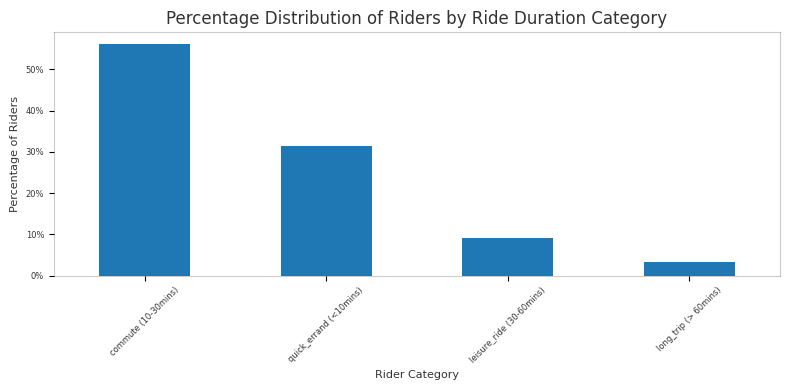

In [35]:
# Plot rider categories
import matplotlib.ticker as mticker

fig = plt.figure(figsize=(8, 4))

rider_buckets.plot(kind='bar')

# Customize the plot
plt.title("Percentage Distribution of Riders by Ride Duration Category", alpha=0.8)
plt.xticks(rotation=45, alpha=0.8)
plt.xlabel('Rider Category', alpha=0.8, fontsize=8)
plt.tick_params(axis='x', labelsize=6)
plt.yticks(alpha=0.8)
plt.tick_params(axis='y', labelsize=6)
plt.ylabel('Percentage of Riders', alpha=0.8, fontsize=8)

plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f"{x*100:.0f}%"))

# Adjust spine visibility
for spine in plt.gca().spines.values():
    spine.set_alpha(0.2)

plt.tight_layout()
plt.show()

In [36]:
rider_buckets_df = (rider_buckets.to_frame().reset_index().rename(columns={'trip_category': 'Category', 'proportion': 'Proportion'}))

rider_buckets_df['Proportion'] = (rider_buckets_df['Proportion'] * 100)
rider_buckets_df['Proportion'] = rider_buckets_df['Proportion'].map(lambda x: f"{x:.2f}%")
rider_buckets_df

,Category,Proportion
0,commute (10-30mins),56.20%
1,quick_errand (<10mins),31.35%
2,leisure_ride (30-60mins),9.04%
3,long_trip (> 60mins),3.41%


<Figure size 1200x600 with 0 Axes>

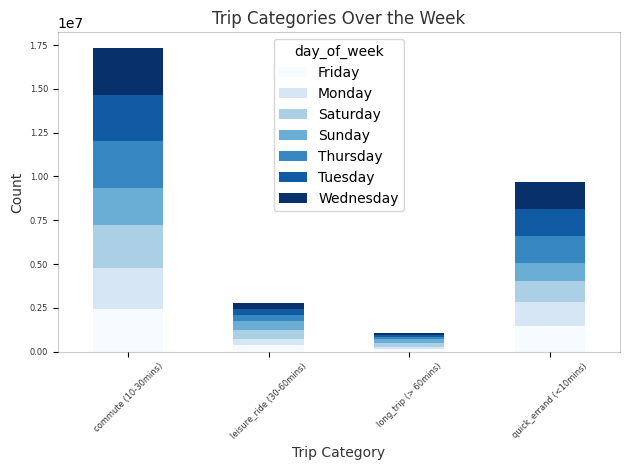

In [37]:
# Group riders by trip_category and day_of_week

fig = plt.figure(figsize=(12,6))

category_day_count = df_combined.groupby(['trip_category', 'day_of_week']).size().sort_values(ascending=False).unstack(fill_value=0)

# Plot bar chart
category_day_count.plot(kind='bar', stacked=True, colormap='Blues')

# Customize the plot
plt.title('Trip Categories Over the Week', alpha=0.8)
plt.xlabel('Trip Category', alpha=0.8)
plt.ylabel('Count', alpha=0.8)
plt.xticks(rotation=45, alpha=0.8)
plt.tick_params(axis='x', labelsize=6)
plt.yticks(alpha=0.8)
plt.tick_params(axis='y', labelsize=6)
# ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f"{int(x):,}"))
for spine in plt.gca().spines.values():
    spine.set_alpha(0.2)
plt.tight_layout()
plt.show()

**Insight**:  
- Commutes & quick errands comprise a significant share of the trips.  
- Within a category (i.e. commute) the number of trips is largely consistent across the week.

In [38]:
# Distribution of rider categories across the week
df_counts = df_combined.groupby(['trip_category', 'day_of_week']).size()
df_percentage = df_counts.groupby(level=1).apply(lambda x: (x / x.sum()) * 100)
print(df_percentage)

day_of_week  trip_category             day_of_week
Friday       commute (10-30mins)       Friday         55.497200
             leisure_ride (30-60mins)  Friday          8.312120
             long_trip (> 60mins)      Friday          3.065774
             quick_errand (<10mins)    Friday         33.124906
Monday       commute (10-30mins)       Monday         55.954693
             leisure_ride (30-60mins)  Monday          8.021724
             long_trip (> 60mins)      Monday          2.890964
             quick_errand (<10mins)    Monday         33.132619
Saturday     commute (10-30mins)       Saturday       55.153270
             leisure_ride (30-60mins)  Saturday       12.655187
             long_trip (> 60mins)      Saturday        5.532668
             quick_errand (<10mins)    Saturday       26.658874
Sunday       commute (10-30mins)       Sunday         54.761780
             leisure_ride (30-60mins)  Sunday         12.644549
             long_trip (> 60mins)      Sunday        

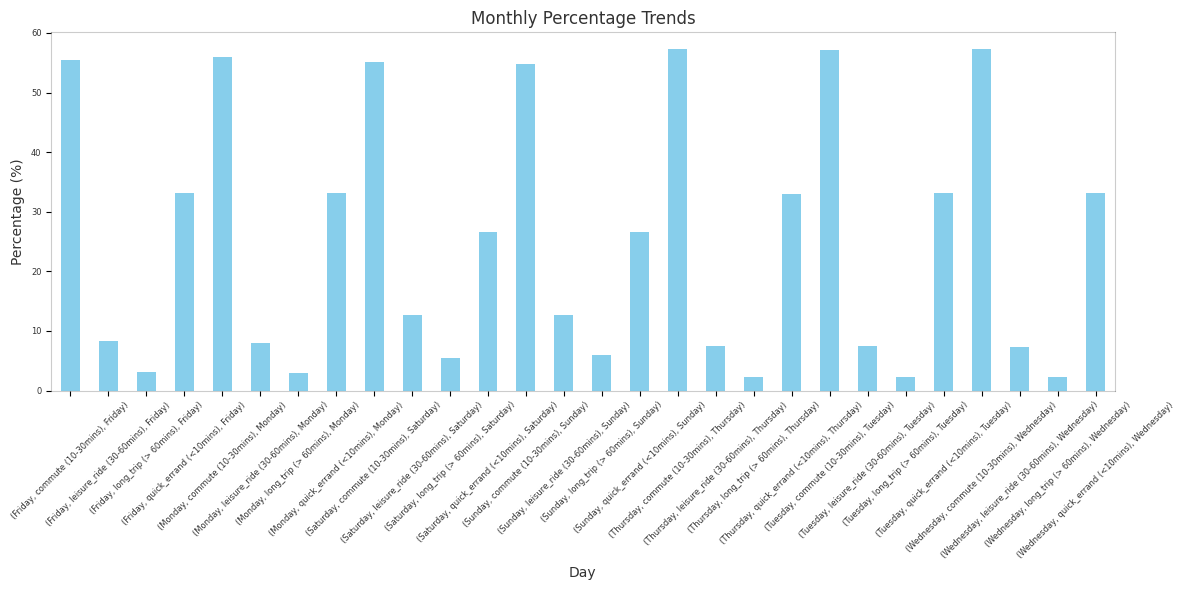

In [39]:
# Plot distribution of rider categories across the week

fig, ax = plt.subplots(figsize=(12, 6))

df_percentage.plot(kind='bar', ax=ax, color='skyblue')

# Title and labels
plt.title('Monthly Percentage Trends', alpha=0.8)
plt.xlabel('Day', alpha=0.8)
plt.ylabel('Percentage (%)', alpha=0.8)

# Formatting x and y axes
plt.xticks(rotation=45, alpha=0.8)
plt.tick_params(axis='x', labelsize=6)
plt.yticks(alpha=0.8)
plt.tick_params(axis='y', labelsize=6)

# Adjust spine visibility
for spine in ax.spines.values():
    spine.set_alpha(0.2)

plt.tight_layout()
plt.show()

---

## **Check for Outliers**

- The business problem is to help a client understand short-term rental-cycle usage patterns.  
- We want to avoid analysing/modelling data that does not reflect realistic user behaviour, which could skew the analysis and mislead insights.  
- We will therefore exclude extreme rental durations because they likely represent anomalies, errors, or usage patterns outside of the intended usage of these bikes.  

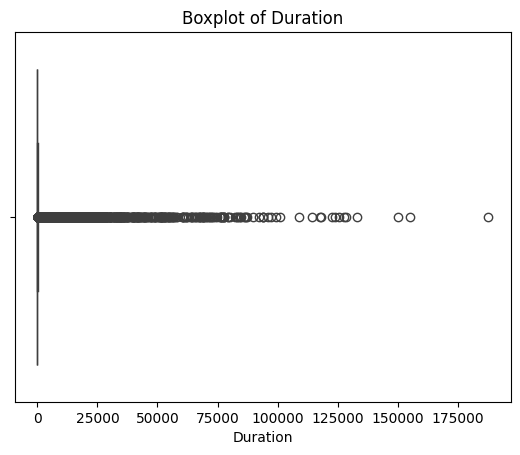

In [40]:
# Boxplot for duration
sns.boxplot(x=df_combined['duration'])

plt.title('Boxplot of Duration')
plt.xlabel('Duration')

plt.show()

**Insight**:  
- For perspective - 25,000 minutes translates into 17 days. This is abnormal user behaviour.  
- 175,000 minutes is ~121 days. It is highly unlikely that a user rented a bicycle for over four months without returning it.  
- This could be due to data entry errors, unreturned bikes, system failures, or misreported timestamps.  
- The client is considering a short-term rental model, so focusing on realistic trip durations (e.g., minutes to a few hours) is more aligned with their interests.  
- Retaining extreme values could distort average trip durations, demand forecasting, and pricing models.  
- The client needs insights into bike availability, peak usage times, and station balancing. Including these extreme values could lead to misleading supply-chain insights, making it seem like some bikes were unavailable for months when they may have been lost or incorrectly logged.

### **Approach to Handling Outliers**

- Exclude bike rentals with durations exceeding 24 hours, as they likely represent system errors, missing returns, or anomalies.  
- Given that the client is focused on short-term rentals, these extreme values do not provide actionable insights into real-world usage patterns.

In [41]:
def filter_data(data, duration):
    df_filtered = data[data['duration'] <= duration]
    filtered_out_data = data.shape[0] - df_filtered.shape[0]
    filtered_out_data_percent = (filtered_out_data / data.shape[0]) * 100
    
    print(f"{filtered_out_data} records were filtered out.")
    print(f"This represents {filtered_out_data_percent:.2f}% of the data.")
    
    return df_filtered

In [42]:
# Assign a threshhold of 2 standard deviations away from the mean to assess reasonability 
mean_duration = df_combined['duration'].mean()
std_duration = df_combined['duration'].std()
threshold = mean_duration + 2 * std_duration
print(f"Mean cycle time of {mean_duration:.2f} minutes.")
print(f"Standard deviation of {std_duration:.2f} minutes.")
print(f"Threshold of {threshold:.2f} minutes represents 2 standard deviations from the mean")

Mean cycle time of 22.61 minutes.
Standard deviation of 229.64 minutes.
Threshold of 481.89 minutes represents 2 standard deviations from the mean


In [43]:
# Assess how much data is lost at different threshholds
for cutoff in [200, 1440, threshold]:  
    percent_lost = (df_combined[df_combined['duration'] > cutoff].shape[0] / df_combined.shape[0]) * 100
    print(f"Threshold {cutoff:.2f} mins: {percent_lost:.2f}% of data lost")

Threshold 200.00 mins: 0.39% of data lost
Threshold 1440.00 mins: 0.05% of data lost
Threshold 481.89 mins: 0.14% of data lost


In [44]:
# Threshhold set to 4 hrs / 240 minutes
df_filtered = filter_data(df_combined, 240)

89711 records were filtered out.
This represents 0.29% of the data.


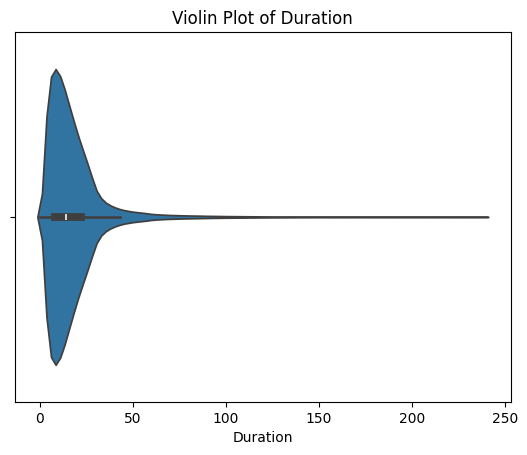

In [45]:
# Plot of duration
sns.violinplot(x=df_filtered['duration'])
plt.title('Violin Plot of Duration')
plt.xlabel('Duration')
plt.show()

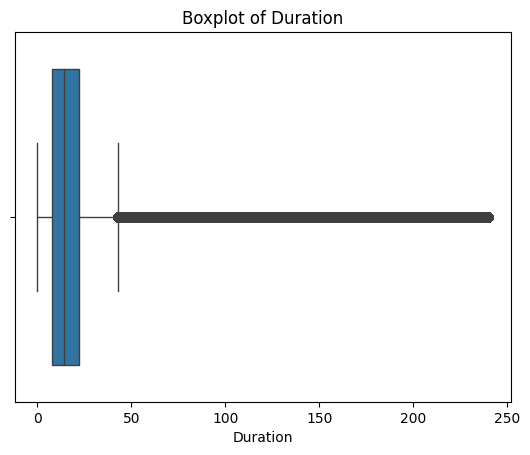

In [46]:
# Boxplot for duration
sns.boxplot(x=df_filtered['duration'])
plt.title('Boxplot of Duration')
plt.xlabel('Duration')
plt.show()

**Insight**:  
- Even after applying a threshhold the data is still heavily skewed.  
- Necessary to apply the IQR Rule.

In [47]:
Q1 = df_filtered['duration'].quantile(0.25)
Q3 = df_filtered['duration'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_refined = df_filtered[(df_filtered['duration'] >= lower_bound) & (df_filtered['duration'] <= upper_bound)]

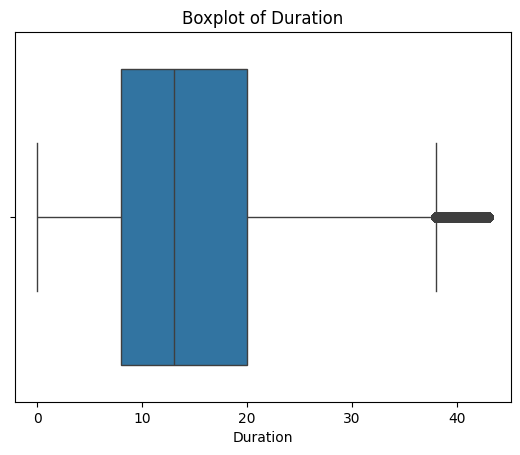

In [48]:
# Boxplot for duration
sns.boxplot(x=df_refined['duration'])
plt.title('Boxplot of Duration')
plt.xlabel('Duration')
plt.show()

**Insight**: Distribution is more evenly distributed.

---

## **Rental Trends Over Time**

### **Daily Trends**

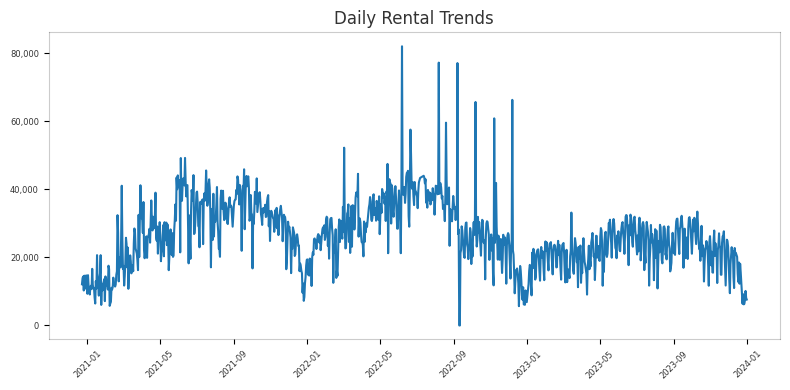

In [49]:
fig, ax = plt.subplots(figsize=(8, 4))

df_refined['start_date'].dt.date.value_counts().sort_index().plot(kind='line')

plt.title('Daily Rental Trends', alpha=0.8)

plt.xticks(rotation=45, alpha=0.8)
plt.tick_params(axis='x', labelsize=6)
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f"{int(x):,}"))
plt.gca().set_xlabel('')

plt.yticks(alpha=0.8)
plt.tick_params(axis='y', labelsize=6)

for spine in ax.spines.values():
    spine.set_alpha(0.2)

plt.tight_layout()
plt.show()

**Insight**:  
- General trend follows the seasons (usage is lower in winter months around Jan and picks up moving into European summer around June).  
- Some spikes are noticeable between Jun-22 and Dec-23. Unclear what these could be (maybe other modes of transport were not working at those times?).
- Overall appears to be somewhat stable usage y-o-y from 2021 to 2022 (excluding 2022 spikes).  
- However, 2023 appears to have declined. Why? Is this anticipated to continue?

### **Trend by Month**

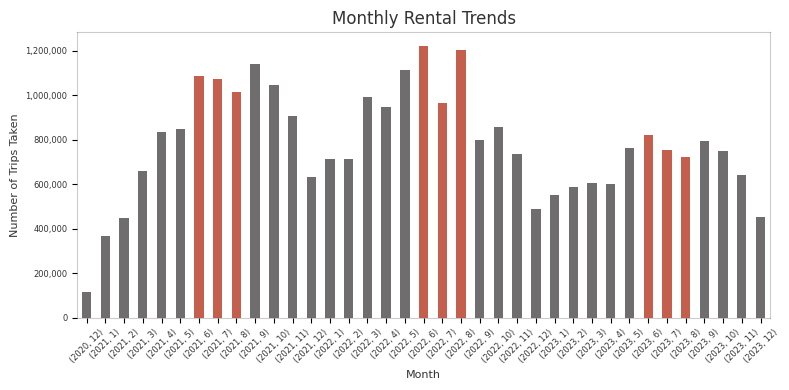

In [50]:
# Group by year and month
monthly_trend = df_refined.groupby([df_refined['start_date'].dt.year, df_refined['start_date'].dt.month]).size()

highlight = {(2021,6),(2021,7),(2021,8),(2022,6),(2022,7), (2022,8), (2023,6), (2023,7), (2023,8) }  # Hours to highlight
colors = ["#AD1B02" if x in highlight else "#322f2f" for x in monthly_trend.index]

# Trend/Regression line
x = np.arange(len(monthly_trend))
y = monthly_trend.values
trend = np.poly1d(np.polyfit(x, y, deg=1))
ax.plot(x, trend(x), color="#AD1B02", linestyle="--", linewidth=1, label="Trend Line")

fig, ax = plt.subplots(figsize=(8, 4))
monthly_trend.plot(kind="bar", ax=ax, alpha=0.7, color=colors)

plt.title('Monthly Rental Trends', alpha=0.8)

plt.xticks(rotation=45, alpha=0.8)
plt.xlabel('Month', alpha=0.8, fontsize=8)
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f"{int(x):,}"))
plt.tick_params(axis='x', labelsize=6)

plt.yticks(alpha=0.8)
plt.ylabel('Number of Trips Taken', alpha=0.8, fontsize=8)
plt.tick_params(axis='y', labelsize=6)

for spine in ax.spines.values():
    spine.set_alpha(0.2)

plt.tight_layout()
plt.show()

**Insight**:  
- Declining trend in usage over time. Why?  
- Google says bike usage has been increasing in London. Error in data? Something else?

---

## **Trip Duration Analysis**

<Axes: ylabel='Frequency'>

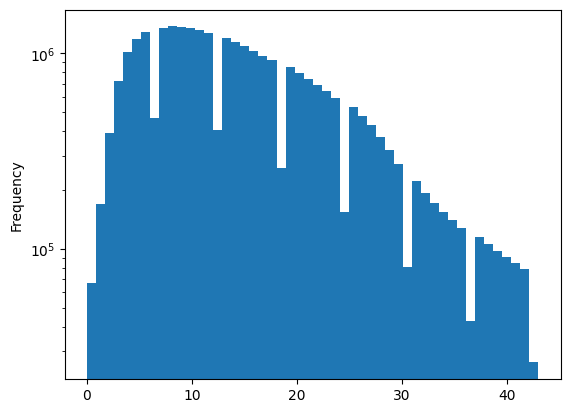

In [51]:
# Assess distribution of durations
# Log scale for visibility
df_refined['duration'].plot(kind='hist', bins=50, logy=True)

**Insight**:  
- Frequency peaks around 10 minutes.

---

## **Busiest Days & Hours**

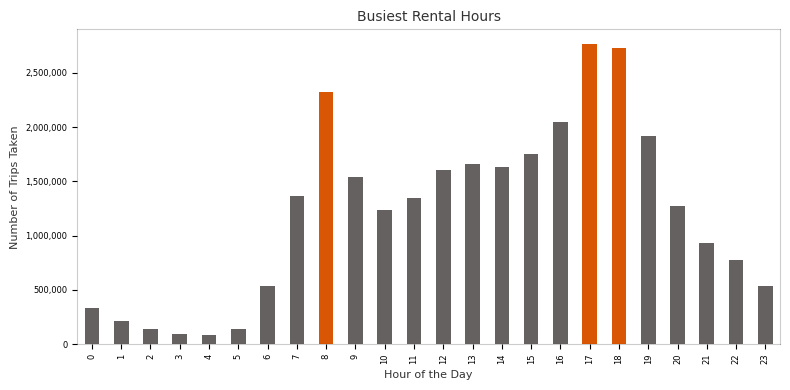

In [52]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

fig, ax = plt.subplots(figsize=(8, 4))

highlight = {8, 17, 18}
colors = ["#D85604" if x in highlight else "#666161" for x in df_refined['time_of_day'].value_counts().sort_index().index]

df_refined['time_of_day'].value_counts().sort_index().plot(kind='bar', ax=ax, color=colors)

ax.set_title('Busiest Rental Hours', alpha=0.8, fontsize=10)
ax.set_ylabel('Number of Trips Taken', alpha=0.8, fontsize=8)
ax.set_xlabel('Hour of the Day', alpha=0.8, fontsize=8)
ax.tick_params(axis='x', labelsize=6)
ax.tick_params(axis='y', labelsize=6)

ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))

for spine in ax.spines.values():
    spine.set_alpha(0.2)

plt.tight_layout()
plt.show()

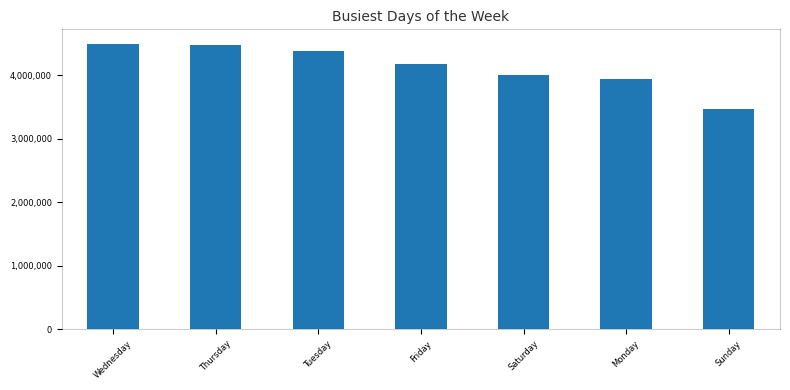

In [53]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

fig, ax = plt.subplots(figsize=(8, 4))

df_refined['day_of_week'].value_counts().plot(kind='bar', ax=ax)

ax.set_title('Busiest Days of the Week', alpha=0.8, fontsize=10)
plt.gca().set_xlabel('')
ax.tick_params(axis='x', labelsize=6, rotation=45)
ax.tick_params(axis='y', labelsize=6)

ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))

for spine in ax.spines.values():
    spine.set_alpha(0.2)

plt.tight_layout()
plt.show()

**Insight**:  
- 8am and 5/6pm appear to be the busiest times of the day.  
- Mondays and weekends are generally less busy.  
- Midweek is the busiest time (is that due to people working at home on Monday & Friday potentially?).  

---

## **Most popular stations**

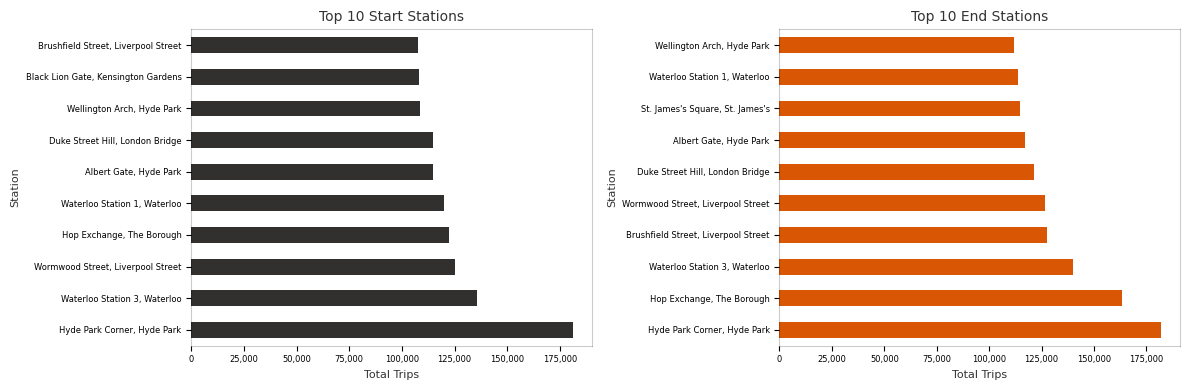

In [54]:
fig,ax = plt.subplots(1,2,figsize=(12,4))

df_refined['start_station_name'].value_counts().head(10).plot(kind='barh', ax=ax[0], color="#322f2f")
df_refined['end_station_name'].value_counts().head(10).plot(kind='barh', ax=ax[1], color="#D85604")

# Top 10 start stations
ax[0].set_title('Top 10 Start Stations', alpha=0.8, fontsize=10)
ax[0].set_ylabel('Station', alpha=0.8, fontsize=8)
ax[0].set_xlabel('Total Trips', alpha=0.8, fontsize=8)
ax[0].tick_params(axis='x', labelsize=6)
ax[0].tick_params(axis='y', labelsize=6)
for spine in ax[0].spines.values():
    spine.set_alpha(0.2)

# Top  10 end stations
ax[1].set_title('Top 10 End Stations', alpha=0.8, fontsize=10)
ax[1].set_ylabel('Station', alpha=0.8, fontsize=8)
ax[1].set_xlabel('Total Trips', alpha=0.8, fontsize=8)
ax[1].tick_params(axis='x', labelsize=6)
ax[1].tick_params(axis='y', labelsize=6)
for spine in ax[1].spines.values():
    spine.set_alpha(0.2)

ax[0].xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))
ax[1].xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))

plt.tight_layout()
plt.show()

In [55]:
net_flow = (df_refined['start_station_name'] == 'Waterloo Station 3, Waterloo').sum() - \
           (df_refined['end_station_name'] == 'Waterloo Station 3, Waterloo').sum()

print(net_flow)

-4699


**Insight**: Hyde Park appears to be a central station where net flow is small.

---

## **Bike usage patterns**

- Compare the net flow of bikes between the morning and evening at each station to identify patterns of inflows and outflows at different times of day.  
- Organise data between weekday trips in the morning and those in the evening.  
- We would expect to see a larger % of people using bikes in the morning for commuting.  

In [56]:
# Isolate trips taken during the week -> filter out weekends
weekday_filter = df_refined[df_refined['start_date'].dt.day_of_week < 5]

In [57]:
# Weekday mornings (between 7am and 9am)
weekday_morning = weekday_filter[(weekday_filter['time_of_day'] >= 7) & (weekday_filter['time_of_day'] <= 9)]

# Weekday evenings (between 5pm and 7pm)
weekday_evening = weekday_filter[(weekday_filter['time_of_day'] >= 17) & (weekday_filter['time_of_day'] <= 19)]

In [58]:
# Calculate net flows by station during week in the morning & evening
weekday_morning_station_usage = weekday_morning.groupby('start_station_name').size() - weekday_morning.groupby('end_station_name').size()
weekday_evening_station_usage = weekday_evening.groupby('start_station_name').size() - weekday_evening.groupby('end_station_name').size()

**Note**:  
- If the result is positive, it indicates that more bikes were taken out than returned (more outflows).  
- If the result is negative, it indicates more bikes were returned than taken out (more inflows).  

In [59]:
weekday_morning_station_usage = weekday_morning_station_usage.to_frame().reset_index()
weekday_evening_station_usage = weekday_evening_station_usage.to_frame().reset_index()

In [60]:
weekday_morning_station_usage.rename(columns={"index": 'station', 0: 'net_flow_morning'}, inplace=True)
weekday_evening_station_usage.rename(columns={"start_station_name": 'station', 0: 'net_flow_evening'}, inplace=True)

In [61]:
# We are interested in stations that appear in both datasets to assess differences in net flows based on time of day
weekday_morning_evening_merged = weekday_morning_station_usage.merge(right=weekday_evening_station_usage, on='station', how='inner')
weekday_morning_evening_merged.head()

,station,net_flow_morning,net_flow_evening
0,"Abbey Orchard Street, Westminster",-13837.0,8407
1,"Abbotsbury Road, Holland Park",853.0,-117
2,"Aberdeen Place, St. John's Wood",3202.0,-1455
3,"Aberfeldy Street, Poplar",823.0,-558
4,"Abingdon Green, Westminster",-9296.0,5738


In [62]:
# Create a new column to show the net flow between morning and evening
weekday_morning_evening_merged['flow_difference'] = weekday_morning_evening_merged['net_flow_morning'] - weekday_morning_evening_merged['net_flow_evening']
weekday_morning_evening_merged.head()

,station,net_flow_morning,net_flow_evening,flow_difference
0,"Abbey Orchard Street, Westminster",-13837.0,8407,-22244.0
1,"Abbotsbury Road, Holland Park",853.0,-117,970.0
2,"Aberdeen Place, St. John's Wood",3202.0,-1455,4657.0
3,"Aberfeldy Street, Poplar",823.0,-558,1381.0
4,"Abingdon Green, Westminster",-9296.0,5738,-15034.0


In [63]:
# Top 10 stations for outflows
weekday_morning_top10 = weekday_morning_evening_merged.sort_values(by="flow_difference", ascending=False).head(10)

# Top 10 stations for inflows
weekday_evening_top10 = weekday_morning_evening_merged.sort_values(by="flow_difference", ascending=True).head(10)

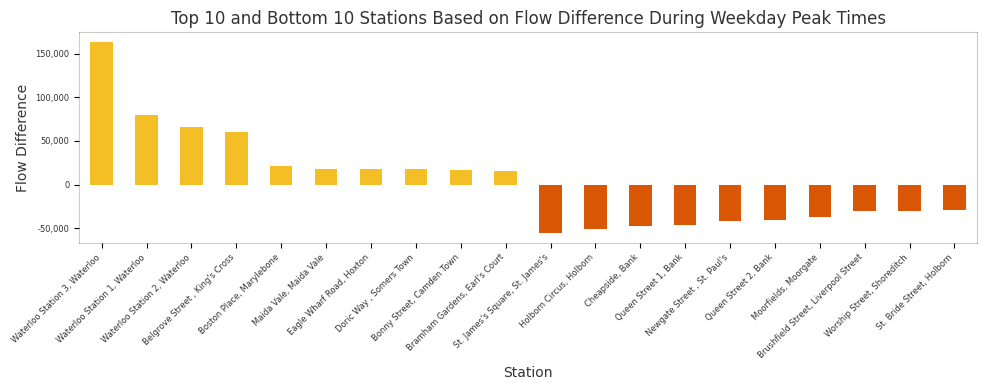

In [64]:
# Select top 10 and bottom 10 stations
top_10_stations = weekday_morning_evening_merged.sort_values(by='flow_difference', ascending=False).head(10)
bottom_10_stations = weekday_morning_evening_merged.sort_values(by='flow_difference', ascending=True).head(10)

# Combine top and bottom stations for comparison
combined_stations = pd.concat([top_10_stations, bottom_10_stations])

fig, ax = plt.subplots(figsize=(10, 4))

combined_stations.plot(kind='bar', x='station', y='flow_difference', color=['#F3BE26']*10 + ['#D85604']*10, legend=False, ax=ax)

plt.title('Top 10 and Bottom 10 Stations Based on Flow Difference During Weekday Peak Times', fontsize=12, alpha=0.8)
plt.xlabel('Station', alpha=0.8)
plt.ylabel('Flow Difference', alpha=0.8)
plt.xticks(rotation=45, ha='right', alpha=0.8)
plt.tick_params(axis='x', labelsize=6)
plt.yticks(alpha=0.8)
plt.tick_params(axis='y', labelsize=6)
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f"{int(x):,}"))
for spine in plt.gca().spines.values():
    spine.set_alpha(0.2)
plt.grid(False)
plt.tight_layout()

plt.show()

---

## **Station imbalances**

<Axes: title={'center': 'Station Demand vs. Supply'}>

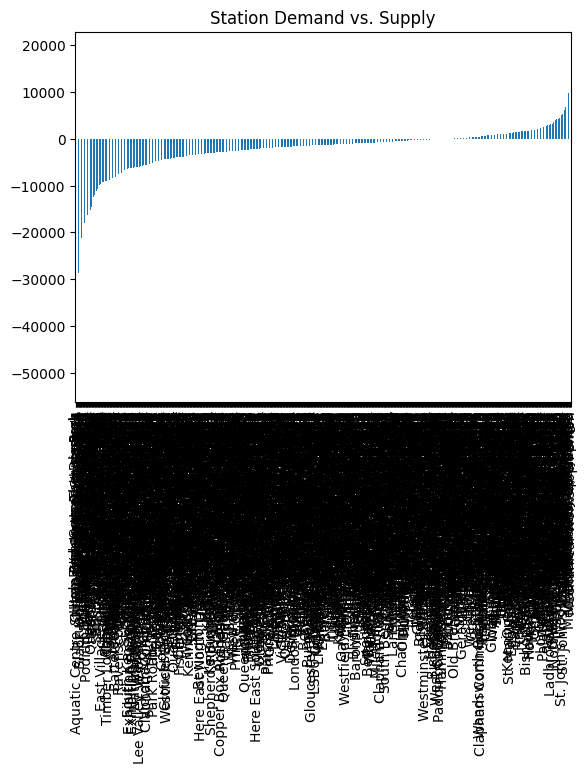

In [65]:
station_usage = df_refined.groupby('start_station_name').size() - df_combined.groupby('end_station_name').size()
station_usage.sort_values().plot(kind='bar', title="Station Demand vs. Supply")

**Insight**:  
- This chart is not particularly useful but serves to show that stations on either end have demand vs supply imbalances.
- How does this impact supply chain considerations?  

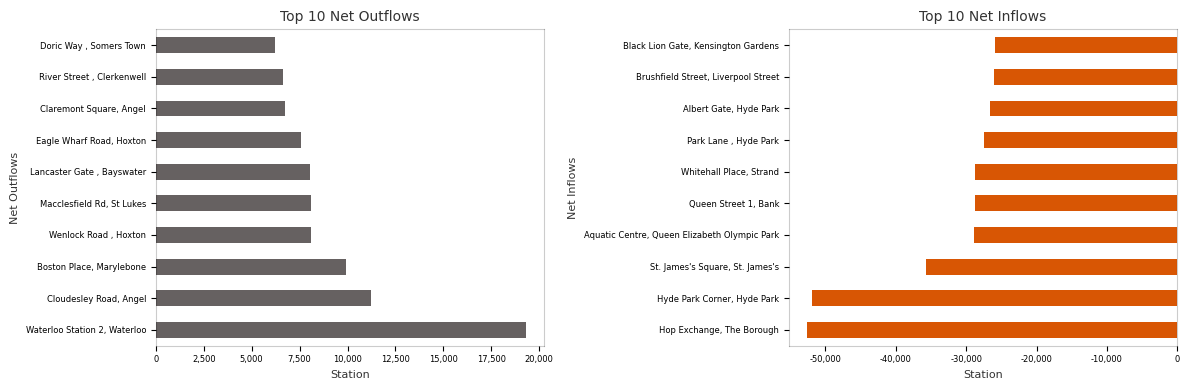

In [66]:
# Visualise demand vs supply imbalances

fig, ax = plt.subplots(1,2, figsize=(12,4))

top_10_net_outflow = station_usage.sort_values(ascending=False)[:10]
top_10_net_inflow = station_usage.sort_values(ascending=True)[:10]

top_10_net_outflow.plot(kind='barh',ax=ax[0], color="#666161")
top_10_net_inflow.plot(kind='barh',ax=ax[1], color="#D85604")

# Net outflows
ax[0].set_title('Top 10 Net Outflows', alpha=0.8, fontsize=10)
ax[0].set_xlabel('Station', alpha=0.8, fontsize=8)
ax[0].set_ylabel('Net Outflows', alpha=0.8, fontsize=8)
ax[0].tick_params(axis='x', labelsize=6)
ax[0].tick_params(axis='y', labelsize=6)
for spine in ax[0].spines.values():
    spine.set_alpha(0.2)

# Net inflows
ax[1].set_title('Top 10 Net Inflows', alpha=0.8, fontsize=10)
ax[1].set_xlabel('Station', alpha=0.8, fontsize=8)
ax[1].set_ylabel('Net Inflows', alpha=0.8, fontsize=8)
ax[1].tick_params(axis='x', labelsize=6)
ax[1].tick_params(axis='y', labelsize=6)
for spine in ax[1].spines.values():
    spine.set_alpha(0.2)

ax[0].xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))
ax[1].xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))

plt.tight_layout()
plt.show()

**Insight**: Possible reasons for differences noted in the the count of trips starting at a station minus the count of trips ending at that station is.  

Positive difference: More trips start here than end here. This station is a bike source (bikes are frequently taken but not returned as often).  
Possible reasons:  
- Located in residential areas (people start trips here to commute elsewhere).  
- Near transit hubs (people rent bikes to get to work or school).  
- Could experience bike shortages if not replenished.  

Negative: More trips end here than start here. This station is a bike sink (bikes are frequently dropped off but not taken as often).  
Possible reasons:  
- Located in office districts, universities, or shopping areas (people ride here but don’t start trips as frequently).  
- Could experience bike congestion, requiring redistribution.  

---

## **Data Science use cases**

1. **Demand Prediction**:  
- Predicting rental demand at different times of day, days of the week, and by station to understand when and where demand will be highest, assisting in supply chain and operational planning.  

2. **Customer Segmentation**:  
- Analysing user behavior based on trip duration, frequency, or station usage to identify customer segments.  

3. **Supply Chain Optimisation**:  
- Predictive model to optimise the supply of bikes across different stations based on bike usage patterns and demand analysis (morning vs evening flows).  

4. **Bike Maintenance Prediction & Fleet Management**:  
- Identify frequent problems (e.g., bikes used for long durations vs. quick trips) by analysing usage patterns to predict when bikes will need maintenance.  

5. **Anomaly Detection**:  
- Detecting unusual cycling patterns or anomalies (such as very long trip durations) could help improve operational efficiency and ensure the service is functioning as expected.  

---

## **Create round trip feature**

In [67]:
# Create a round_trip column
# 1 if start and end station are the same, 0 otherwise
df_refined['round_trip'] = (df_refined['start_station_name'] == df_refined['end_station_name']).astype(int)

# Calculate the number of total trips, round trips, one way trips
total_trips = len(df_refined)
count_of_round_trips = len(df_refined[df_refined.round_trip == 1])
count_of_one_way_trips = len(df_refined[df_refined.round_trip == 0])

# Calcualte the percentage of round trips and one way trips
percent_round_trips = count_of_round_trips / total_trips * 100
percent_one_way_trips = count_of_one_way_trips / total_trips *100

print(f"{percent_round_trips:.2f}% of trips are round trips")
print(f"{percent_one_way_trips:.2f}% of trips are one way")

/var/folders/xk/r3ls7bqd0b3fdrwsj9bcv3t40000gn/T/ipykernel_70259/1003914225.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_refined['round_trip'] = (df_refined['start_station_name'] == df_refined['end_station_name']).astype(int)


3.26% of trips are round trips
96.74% of trips are one way


---

## **Create new column for day of week**

In [68]:
df_refined['day_of_week_int'] = df_refined['start_date'].dt.dayofweek

/var/folders/xk/r3ls7bqd0b3fdrwsj9bcv3t40000gn/T/ipykernel_70259/2385442673.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_refined['day_of_week_int'] = df_refined['start_date'].dt.dayofweek


---

## **Demand Forecasting**

Build a simple regression model to predict bike demand at each station at different times based on:  
- Create a demand target variable.  
- Number of rentals (rows) that occurred at each station and time period will be the proxy for demand.  
- Group by <code>start_station_name</code>, <code>time_of_day</code>, and <code>day_of_week</code> to get the total number of rentals for those features.  

**Rationale**: Every row in df_refined gets a demand value that corresponds to the total number of trips from that station at that specific time and day of the week.

In [69]:
# Group by start station, time of day, and day of week to calculate demand
# Measures 'demand' at each occurrence of unique groups
df_demand = df_refined.groupby(['start_station_name', 'time_of_day', 'day_of_week']).size().reset_index(name='demand')

df_refined = pd.merge(df_refined, df_demand, on=['start_station_name', 'time_of_day', 'day_of_week'], how='left')

df_refined.head()

,rental_id,duration,bike_id,end_date,end_station_name,start_date,start_station_name,start_station_id,end_station_id,day_of_week,time_of_day,trip_category,round_trip,day_of_week_int,demand
0,104708347,40.0,12134,2020-12-27 14:37:00,"Hop Exchange, The Borough",2020-12-27 13:57:00,"Curlew Street, Shad Thames",2,306,Sunday,13,leisure_ride (30-60mins),0,6,526
1,104664061,5.0,18429,2020-12-24 15:23:00,"Walnut Tree Walk, Vauxhall",2020-12-24 15:18:00,"Baylis Road, Waterloo",3,372,Thursday,15,quick_errand (<10mins),0,3,445
2,104723992,24.0,17175,2020-12-28 13:30:00,"Blenheim Crescent, Ladbroke Grove",2020-12-28 13:06:00,"Albert Gate, Hyde Park",4,5,Monday,13,commute (10-30mins),0,0,1375
3,104721666,14.0,15313,2020-12-28 11:23:00,"Black Lion Gate, Kensington Gardens",2020-12-28 11:09:00,"Blenheim Crescent, Ladbroke Grove",5,435,Monday,11,commute (10-30mins),0,0,212
4,104723631,14.0,17175,2020-12-28 13:05:00,"Albert Gate, Hyde Park",2020-12-28 12:51:00,"Pall Mall East, West End",6,4,Monday,12,commute (10-30mins),0,0,267


**Insight**:  
- Accounts for actual rental behavior at specific times.  
- Captures variability over different days/times.  

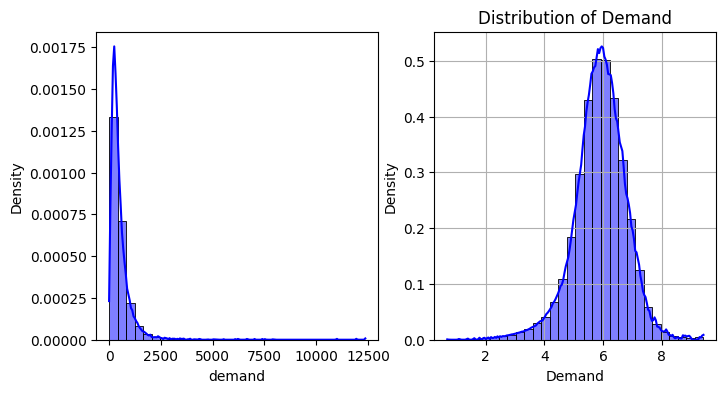

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

fig,ax =plt.subplots(1,2,figsize=(8, 4))

# Log transform
df_refined['demand_log'] = np.log1p(df_refined['demand'])

# Distribution of demand
sns.histplot(df_refined['demand'], bins=30, kde=True, color='blue', stat='density', ax=ax[0])
sns.histplot(df_refined['demand_log'], bins=30, kde=True, color='blue', stat='density', ax=ax[1])
plt.title('Distribution of Demand')
plt.xlabel('Demand')
plt.ylabel('Density')
plt.grid(True)
plt.show()

---

## **Feature Engineering**

Encode start and end locations:  
- One-hot encoding will create a column for each of the 861 unique stations. This is not efficient.  
- Label encoding may introduce ordinal relationships that aren’t actually present.  
- Frequency encoding: Encode stations based on their frequency of appearance. More popular stations (with higher rental counts) get a higher value, less popular stations get a lower value.  

In [71]:
# Frequency encoding for start_station and end_station
start_station_counts = df_refined['start_station_name'].value_counts()
df_refined["start_station_encoded"] = df_refined["start_station_name"].map(start_station_counts)

end_station_counts = df_refined['end_station_name'].value_counts()
df_refined['end_station_encoded'] = df_refined['end_station_name'].map(end_station_counts)

---

## **Sampling**

Stratifying based on the day of the week to account for cyclical patterns over the course of the week.  

In [72]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=42)

features = ['start_station_encoded', 'time_of_day', 'day_of_week_int']
X = df_refined[features]
y = df_refined['demand_log']

# Maintain the same proportion of day_of_week_int in both training and testing sets.
for train_index, test_index in sss.split(X, df_refined['day_of_week_int']):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

---

## **Train Model**

### **Linear Regression**

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr_model = LinearRegression()

lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.5128954479877098
Root Mean Squared Error: 0.716167192761376
R-squared: 0.3584453580108906


In [75]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

mse_scores = -cv_scores
rmse_scores = np.sqrt(mse_scores)

print(f'MSE Scores: {mse_scores}')
print(f'RMSE Scores: {rmse_scores}')
print(f'Average RMSE: {np.mean(rmse_scores)}')

MSE Scores: [0.51336478 0.51315279 0.51242515 0.51275482 0.51290758]
RMSE Scores: [0.71649479 0.71634683 0.71583877 0.71606901 0.71617566]
Average RMSE: 0.7161850125571714


In [76]:
# Find top 10 stations by demand
top_stations_actual = (
    df_refined[df_refined['time_of_day'] == 8]
    .groupby(['start_station_name', 'start_station_encoded'])['demand_log']
    .max()
    .nlargest(10)
    .reset_index()
)

# Create a prediction DataFrame for top 10 stations
# Look at 8am on Tuesday
df_prediction = pd.DataFrame({
    'start_station_encoded': top_stations_actual['start_station_encoded'],
    'start_station_name': top_stations_actual['start_station_name'],
    'time_of_day': [8] * len(top_stations_actual),
    'day_of_week_int': [2] * len(top_stations_actual)
})

# Order needs to match training data
X_predict = df_prediction[['start_station_encoded', 'time_of_day', 'day_of_week_int']]
X_predict = pd.DataFrame(X_predict, columns=features)

df_prediction['predicted_demand'] = lr_model.predict(X_predict)

df_comparison = df_prediction.merge(top_stations_actual[['start_station_name', 'demand_log']], on='start_station_name')

print(df_comparison[['start_station_name', 'demand_log', 'predicted_demand']])

                      start_station_name  demand_log  predicted_demand
0           Waterloo Station 3, Waterloo    9.422949          7.518467
1           Waterloo Station 1, Waterloo    8.857515          7.218026
2         Belgrove Street , King's Cross    8.542276          6.910374
3           Waterloo Station 2, Waterloo    8.382747          6.377094
4      Wormwood Street, Liverpool Street    7.976939          7.319556
5        Duke Street Hill, London Bridge    7.760467          7.110882
6               Eagle Wharf Road, Hoxton    7.760041          6.323113
7            Eastbourne Mews, Paddington    7.593878          5.948600
8               Boston Place, Marylebone    7.556428          5.949418
9  Kennington Lane Rail Bridge, Vauxhall    7.531016          6.372515


In [77]:
# Convert log predictions and actual demand back to original scale
df_comparison['predicted_demand_original'] = np.exp(df_comparison['predicted_demand'])
df_comparison['demand_original'] = np.exp(df_comparison['demand_log'])
df_comparison[['start_station_name', 'demand_original', 'predicted_demand_original']]

,start_station_name,demand_original,predicted_demand_original
0,"Waterloo Station 3, Waterloo",12369.0,1841.741317
1,"Waterloo Station 1, Waterloo",7027.0,1363.793708
2,"Belgrove Street , King's Cross",5127.0,1002.622123
3,"Waterloo Station 2, Waterloo",4371.0,588.216030
4,"Wormwood Street, Liverpool Street",2913.0,1509.533998
5,"Duke Street Hill, London Bridge",2346.0,1225.228280
6,"Eagle Wharf Road, Hoxton",2345.0,557.305449
7,"Eastbourne Mews, Paddington",1986.0,383.216349
8,"Boston Place, Marylebone",1913.0,383.530133
9,"Kennington Lane Rail Bridge, Vauxhall",1865.0,585.528395


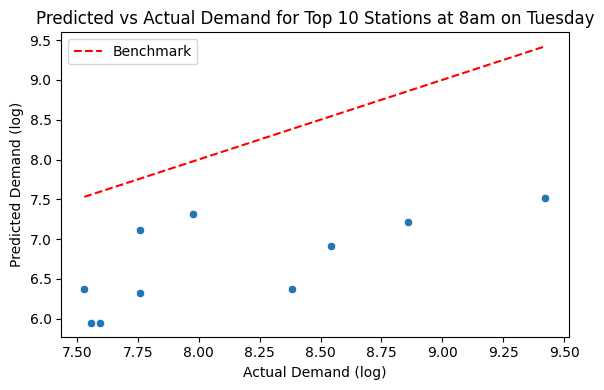

In [78]:
# Plot actual vs predicted and display benchmark line for accuracy

plt.figure(figsize=(6, 4))
sns.scatterplot(x='demand_log', y='predicted_demand', data=df_comparison)

plt.plot([df_comparison['demand_log'].min(), df_comparison['demand_log'].max()], [df_comparison['demand_log'].min(), df_comparison['demand_log'].max()], color='red', linestyle='--', label='Benchmark')

plt.xlabel('Actual Demand (log)')
plt.ylabel('Predicted Demand (log)')
plt.title('Predicted vs Actual Demand for Top 10 Stations at 8am on Tuesday')

plt.legend()
plt.tight_layout()
plt.show()

---

### **Random Forest**

Use GridSearchCV to find best hyperparameters for the Random Forest model

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestRegressor

# rf = RandomForestRegressor()

# param_grid = {
#     'n_estimators': [100, 200],
#     'max_depth': [10, 20],
#     'max_features': ['auto', 'sqrt', 'log2', None]
# }

# grid_search = GridSearchCV(rf, param_grid, cv=5)

# grid_search.fit(X_train, y_train)

# print(grid_search.best_params_)

# print(grid_search.score(X_test, y_test))

---

### **Gradient Boosting Regressor**

In [ ]:
# from sklearn.ensemble import GradientBoostingRegressor

# gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
# gb.fit(X_train, y_train)

# mse_scores = -cross_val_score(gb, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
# rmse_scores = np.sqrt(mse_scores)
# importances = gb.feature_importances_
# feature_importance_dict = dict(zip(X_train.columns, importances))
# sorted_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# for feature, importance in sorted_importances:
#     print(f"{feature}: {importance:.4f}")

# print("MSE Scores:", mse_scores)
# print("RMSE Scores:", rmse_scores)
# print("Average RMSE:", np.mean(rmse_scores))

---

### **SGD Regressor**

In [ ]:
# from sklearn.linear_model import SGDRegressor
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# sgd_model = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
# sgd_model.fit(X_train_scaled, y_train)

# cv_scores = cross_val_score(sgd_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# y_pred = sgd_model.predict(X_test_scaled)
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# r2 = r2_score(y_test, y_pred)

# print(f"Cross-Validation MSE Scores: {-cv_scores}")
# print(f"Mean CV MSE: {-cv_scores.mean()}")
# print(f"Test RMSE: {rmse}")
# print(f"Test R²: {r2}")

#### **Train on subset of data**

Will result in significant data loss, but should help speed up training time (edit: Still took over 30mins and never finished)

In [ ]:
# from sklearn.model_selection import train_test_split

# X_sample, _, y_sample, _ = train_test_split(X_train, y_train, test_size=0.9, random_state=42)

# sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
# sgd_reg.fit(X_sample, y_sample)

# y_pred = sgd_reg.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# r2 = r2_score(y_test, y_pred)

# print(f'Mean Squared Error: {mse}')
# print(f'Root Mean Squared Error: {rmse}')
# print(f'R-squared: {r2}')

---

## **Clustering**

          duration  day_of_week_int  time_of_day  cluster
2333692        9.0                1           19        5
3111439       12.0                6           19        1
6192722        7.0                2           17        5
18456004      16.0                6           16        1
13688641      36.0                5           14        0


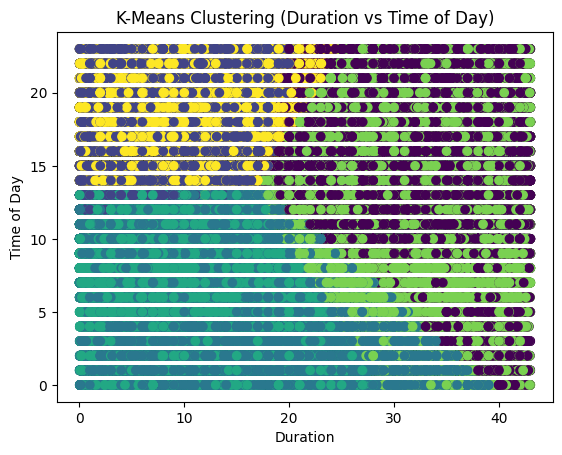

In [79]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Test a sample of 40% of the data to speed up training
df_sampled = df_refined.sample(frac=0.4, random_state=42)

features = ['duration', 'day_of_week_int', 'time_of_day']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_sampled[features])

kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(X_scaled)

df_sampled['cluster'] = kmeans.labels_

print(df_sampled[['duration', 'day_of_week_int', 'time_of_day', 'cluster']].head())

import matplotlib.pyplot as plt
plt.scatter(df_sampled['duration'], df_sampled['time_of_day'], c=df_sampled['cluster'], cmap='viridis')
plt.xlabel('Duration')
plt.ylabel('Time of Day')
plt.title('K-Means Clustering (Duration vs Time of Day)')
plt.show()

In [80]:
# Check balance of clusters
print(df_sampled['cluster'].value_counts(normalize=True))

cluster
1    0.224664
5    0.191403
3    0.175955
2    0.157022
0    0.135325
4    0.115632
Name: proportion, dtype: float64


In [81]:
# Check clusters for Tuesday @ 8am
df_filtered = df_sampled[(df_sampled['time_of_day'] == 8) & (df_sampled['day_of_week_int'] == 2)]

cluster_trip_counts = df_filtered.groupby(['cluster', 'trip_category']).size().reset_index(name='count')

print(cluster_trip_counts)

   cluster             trip_category  count
0        3       commute (10-30mins)  98829
1        3    quick_errand (<10mins)  60659
2        4       commute (10-30mins)  27204
3        4  leisure_ride (30-60mins)   8345


---